In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'svg'

In [2]:
from lib.w2v.w2v import *

In [4]:
newsgroup_model = model_from_saved("./temp/models-ec2/newsgroup", binary=False)
enron_model = model_from_saved("./temp/models-ec2/enron", binary=False)

In [5]:
from scipy import spatial

intersect_vocab = intersect_vocab(enron_model, newsgroup_model)
vocabs = {}
for word in intersect_vocab:
    cosine_dist = spatial.distance.cosine(newsgroup_model[word], enron_model[word])
    vocabs[word] = cosine_dist

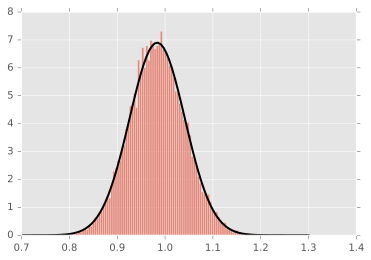

In [6]:
import matplotlib.pyplot as plot
plot.hist(vocabs.values(), normed=True, bins=100, alpha=0.6)

import numpy as np
from scipy.stats import norm

mu, std = norm.fit(vocabs.values())

xmin, xmax = plot.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plot.plot(x, p, 'k', linewidth=2)
plot.figure()

In [7]:
tolerance = 0.005
for word in vocabs.keys():
    p = norm.cdf(vocabs[word], mu, std)
    if (p < tolerance) or (p > 1 - tolerance):
        print ("%f %s" % (vocabs[word], word))

0.789862 foul
1.149520 commented
1.141431 explained
1.191873 nightline
0.792237 keeps
1.141290 yesterday
1.142551 cummings
1.137311 dummy
0.829422 chile
1.179013 appeals
0.803616 haiti
0.779175 dealer
1.169362 holt
0.827483 retrofit
0.807728 trails
1.146537 specifically
1.151540 handbook
1.149133 rossi
1.164293 unreliable
0.818632 gradient
1.143635 population
1.171890 gregory
0.815485 hast
0.804457 petroleum
0.824644 phillip
1.171321 granted
0.822087 cri
1.133073 fitting
0.824804 bu
0.827469 intrepid
0.832344 occurred
0.821430 drill
1.145312 derivative
0.832971 stock
1.159519 hussein
1.146189 false
0.776485 asserts
1.152136 frame
0.794447 cb
0.832633 gradual
1.175025 coins
1.140788 demanded
1.200805 indicated
1.149512 hong
0.801409 ntt
1.137596 irregularities
1.134424 observer
0.819286 climate
1.132773 orchid
0.777944 xu
1.135556 altering
1.132619 rarely
1.148882 challenged
1.133917 entrusted
0.827391 telephones
1.143810 landing
0.819828 script
0.811803 earnest
0.833549 annually
1.1731

In [8]:
print vocabs['meeting']

0.98237289556
